In [1]:
import pickle
with open('/Users/chris/mankovich2019_production_saturns/1520008380.22/tof4_data.pkl', 'rb') as f:
    par, sca, vec = pickle.load(f, encoding='latin1')

In [31]:
par
# sca

{'y1': 0.2542192984185313,
 'mtot': 5.6834e+29,
 'atm_option': 'f11_fit sat',
 'evol_verbosity': 2,
 'mtot_rtol': 0.0001,
 'fmean_core_bdy_mesh_boost': 0.2,
 'amplitude_core_mesh_boost': 30.0,
 'evol_outer_method': 'adjust_mcore',
 'req': 6026800000.0,
 'method_for_aa2n_solve': 'cubic 32',
 'nz': 4096,
 'max_iters_outer': 100,
 'ym': 0.275,
 'small': 0.1396486194254027,
 'path_to_eos_data': '/pfs/home/cmankovich/saturn_gravity/ongp/data',
 'z1': 0.03784225429445804,
 'z2': 0.3293863115959092,
 'mesh_func_type': 'flat_with_surface_exponential_core_gaussian',
 'mcore': 2.0,
 'ptrans': 1.7794089906371262,
 'j2n_rtol': 0.0001,
 't1': 140.0,
 'max_iters_inner': 3,
 'width_core_mesh_boost': 0.15,
 'z_eos_option': 'reos water',
 'model_type': 'evol',
 'verbosity': 1}

In [46]:
import single
reload(single)
pairs = []
pairs.append(np.array([0.02, 0.03]))
pairs.append(np.array([0.03, 0.045]))
pairs.append(np.array([0.04, 0.06]))
pairs.append(np.array([0.06, 0.12]))
pairs.append(np.array([0.1, 0.15]))
pairs.append(np.array([0.08, 0.08]))
pairs.append(np.array([0.1, 0.1]))
pairs.append(np.array([0.12, 0.12]))
pairs.append(np.array([0.15, 0.15]))
for pair in pairs:
    z1, z2 = pair
    run = single.run(z1, z2, 0.18, 1.5)

trying 0.02 0.03 1.5 0.18
initial model: mtot_calc, reldiff 5.683399999999987e+29 2.352475876017201e-15
 i_outer      rhobar   mtot_calc       mcore       kcore          nz          y2          ym    et_total    inr_itrs          j2          j4          j6         req          rm 
       0     0.59268  5.6834e+29          16        1162        4096           0       0.275     0.08696           2    0.016226 -0.00091972   7.684e-05  6.3334e+09  6.1174e+09 


/Users/chris/zrich_saturns/tof.py:174: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  self.pp0 = np.poly1d(legendre(0))
/Users/chris/zrich_saturns/tof.py:175: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  self.pp2 = np.poly1d(legendre(2))
/Users/chris/zrich_saturns/tof.py:176: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  self.pp4 = np.poly1d(legendre(4))
/Users/chris/zrich_saturns/tof.py:177: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  self.pp6 = np.poly1d(legendre(6))
/Users/chris/zrich_saturns/tof.py:178: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  self.pp8 = np.poly1d(legendre(8))


       1     0.76103  6.2885e+29      24.768        1962        4096     0.49783      0.1262     0.21361           2    0.019222  -0.0012049  0.00010867  6.0376e+09  5.8213e+09 
       2     0.72489  5.9577e+29      18.395        1286        4096     0.34795     0.35978     0.34974           2    0.013981 -0.00079115  6.8668e-05  6.0082e+09  5.8108e+09 
       3     0.64103  5.3176e+29      14.715         998        4096     0.34614     0.27603     0.48674           2    0.013865 -0.00076787  6.5399e-05  6.0263e+09  5.8288e+09 
       4     0.64115  5.3198e+29      18.782        1318        4096     0.38303     0.25774     0.61935           2    0.015769 -0.00091106  7.8933e-05  6.0336e+09  5.8293e+09 
       5     0.66705  5.5161e+29      23.038        1398        4096     0.39639     0.26913     0.74901           2    0.015346 -0.00089183  7.7566e-05  6.0253e+09  5.8228e+09 
       6     0.67755  5.6071e+29      24.858        1365        4096     0.38664     0.27948      0.8786      

In [89]:
from scipy.interpolate import splev, splrep
import os
import pickle
print('{:>20} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format('uid', 'y1', 'z1', 'z2', 'ptrans', 'j2_1e6', 'j4_1e6', 'j6_1e6', 'y2', 'mcore', 'rho94', 'p94'))
for item in sorted(os.listdir('output')):
    if item[0] == '.': continue
    with open('{}/{}/tof4_data.pkl'.format('output', item), 'rb') as f:
        par, sca, vec = pickle.load(f)
        rho94 = splev(0.94, splrep(vec['l']/vec['l'][-1], vec['rho']))
        p94 = splev(0.94, splrep(vec['l']/vec['l'][-1], vec['p'])) * 1e-12
        sca['rho94'] = rho94
        sca['p94'] = p94
        print('{:>20} {:>8.4f} {:>8.4f} {:>8.4f} {:>8.4f} {:>8.2f} {:>8.2f} {:>8.2f} {:>8.4f} {:>8.4f} {:>8.4f} {:>8.4f}'.format(sca['uid'].replace('.',''), par['y1'], par['z1'], par['z1'], par['ptrans'], sca['j2']*1e6, sca['j4']*1e6, sca['j6']*1e6, sca['y2'], sca['mcore'], rho94, p94))


                 uid       y1       z1       z2   ptrans   j2_1e6   j4_1e6   j6_1e6       y2    mcore    rho94      p94
    1553192811337385   0.2500   0.0200   0.0200   1.5000 14822.63  -859.09    74.31   0.3068  27.4817   0.1211   0.0189
   15531928243654568   0.2500   0.0300   0.0300   1.5000 15143.93  -882.68    76.62   0.3062  26.4014   0.1235   0.0193
   15531928380545568   0.2500   0.0400   0.0400   1.5000 15476.53  -907.29    79.05   0.3057  25.2864   0.1259   0.0197
    1553192850398071   0.2500   0.0600   0.0600   1.5000 16292.23  -964.62    84.65   0.3036  21.8206   0.1310   0.0207
    1553192861855547   0.2500   0.1000   0.1000   1.5000 17791.20 -1082.34    96.59   0.3027  17.9970   0.1422   0.0226
    1553192868125547   0.2500   0.0800   0.0800   1.5000 16799.88 -1011.56    89.57   0.3050  22.0979   0.1364   0.0216
   15531928789742458   0.2500   0.1000   0.1000   1.5000 17568.87 -1072.38    95.77   0.3043  20.0555   0.1421   0.0226
    1553192890391992   0.2500   0.1200  

                 uid       y1       z1       z2   ptrans   j2_1e6   j4_1e6   j6_1e6       y2    mcore    rho94      p94
   1553193088.266504   0.1800   0.0800   0.0800   1.5000 15702.49  -917.53    80.22   0.3786  21.6609   0.1288   0.0204
  1553193097.0723379   0.1800   0.1000   0.1000   1.5000 16426.22  -972.26    85.68   0.3765  19.5764   0.1342   0.0214
   1553193105.918338   0.1800   0.1200   0.1200   1.5000 17208.61 -1032.39    91.75   0.3744  17.4230   0.1399   0.0224
   1553193114.503964   0.1800   0.1500   0.1500   1.5000 18513.65 -1134.88   102.22   0.3714  14.0573   0.1492   0.0241


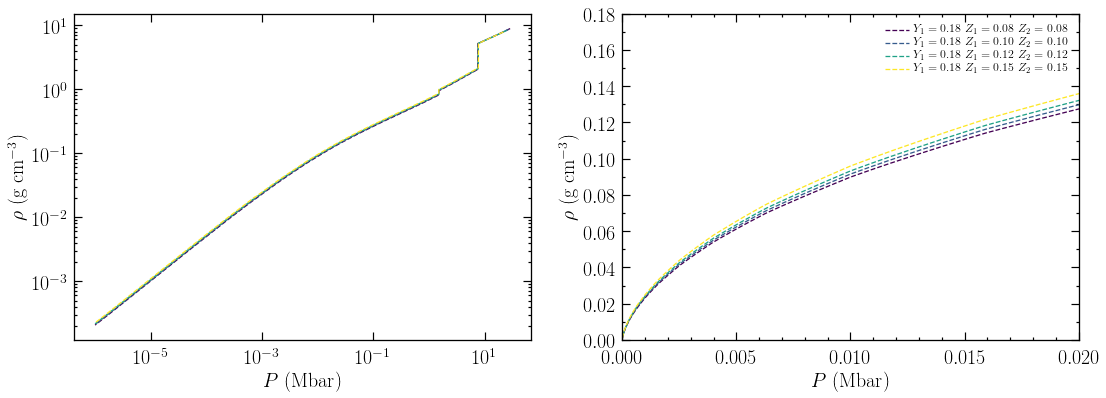

In [81]:
from scipy.interpolate import splev, splrep
import os
import pickle
print('{:>20} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format('uid', 'y1', 'z1', 'z2', 'ptrans', 'j2_1e6', 'j4_1e6', 'j6_1e6', 'y2', 'mcore', 'rho94', 'p94'))
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
minz1 = 0.08
maxz1 = 0.15
for item in sorted(os.listdir('output')):
    if item[0] == '.': continue
    with open('{}/{}/tof4_data.pkl'.format('output', item), 'rb') as f:
        par, sca, vec = pickle.load(f)
        color = plt.get_cmap()((par['z1'] - minz1) / (maxz1 - minz1))
        if par['z1'] != par['z2']: continue
        if par['y1'] != 0.18: continue
        ls = {0.18:'--', 0.25:'-'}[par['y1']]
#         plt.plot(vec['l'] / vec['l'][-1], vec['rho'])
        ax[0].loglog(vec['p']*1e-12, vec['rho'], color=color, ls=ls)
        ax[1].plot(vec['p']*1e-12, vec['rho'], color=color, label=r'$Y_1={:.2f}\ Z_1={:.2f}\ Z_2={:.2f}$'.format(par['y1'], par['z1'], par['z2']), ls=ls)
        rho94 = splev(0.94, splrep(vec['l']/vec['l'][-1], vec['rho']))
        p94 = splev(0.94, splrep(vec['l']/vec['l'][-1], vec['p'])) * 1e-12
        sca['rho94'] = rho94
        sca['p94'] = p94
        print('{:>20} {:>8.4f} {:>8.4f} {:>8.4f} {:>8.4f} {:>8.2f} {:>8.2f} {:>8.2f} {:>8.4f} {:>8.4f} {:>8.4f} {:>8.4f}'.format(sca['uid'], par['y1'], par['z1'], par['z1'], par['ptrans'], sca['j2']*1e6, sca['j4']*1e6, sca['j6']*1e6, sca['y2'], sca['mcore'], rho94, p94))
        
ax[1].yaxis.set_ticks(ticks)
ax[1].yaxis.set_ticks(ticks[:-1]+0.01, 'minor')
ax[1].legend(fontsize=12)
    
[z.set_xlabel(r'$P\ ({\rm Mbar})$') for z in ax]
[z.set_ylabel(r'$\rho\ ({\rm g\ cm^{-3}})$') for z in ax]
ax[1].set_xlim(0, 0.02)
ax[1].set_ylim(0, 0.18)
plt.savefig('zrich_saturns_y018.pdf', bbox_inches='tight')

In [85]:
for item in sorted(os.listdir('output')):
    if item[0] == '.': continue
    with open('{}/{}/tof4_data.pkl'.format('output', item), 'rb') as f:
        par, sca, vec = pickle.load(f)
    rho94 = splev(0.94, splrep(vec['l']/vec['l'][-1], vec['rho']))
    p94 = splev(0.94, splrep(vec['l']/vec['l'][-1], vec['p'])) * 1e-12
    sca['rho94'] = float(rho94)
    sca['p94'] = float(p94)
    np.save('zrich_saturns_03212019/{}.npy'.format(sca['uid'].replace('.','')), {'par':par,'sca':sca,'vec':vec})

In [86]:
model = np.load('zrich_saturns_03212019/1553193105918338.npy').item()
model['par']['y1'], model['par']['z1'], model['par']['z2'], model['sca']['rho94'] # (0.18, 0.12, 0.12, 0.13988238681104992)

(0.18, 0.12, 0.12, 0.13988238681104992)